Observations and Insights 

1. According to summary statistics results across all drug regimens used for the study, Capomulin and Ramicane drug regimens showed most promising results in average tumor volume. Though, as we will see below, there is possible a strong correlation between weight of a mouse and average tumor volume (correlation was done only for one drug regimen - Capomulin). As analisys of average weight of mice for each drug regimen was not an object of this analisys, we can not be sure that mice were equally distributed across digfferent drug regimens by weight (the same goes for mice age). Therethrough, it is difficult to say are Capomulin and Ramicane drug regimens as successeful, as they seems.
2. According to summary statistics results across values, data set has a symmetrical distribution (mean and median of average tumor volume are close together). In the same time, low value of standart error shows us that estimated with this analysis mean of tumor volume is reliable for statistics purposes. 
3. According to data analysis results of using Capomulin as drug regimen there is a strong correlation between weight of a mouse and average tumor volume (correlation coefficient is 0.84).


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mice data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
#Creating a dataframe with mice data
mouse_data = pd.DataFrame(mouse_metadata)
mouse_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Checking the number of mice in mice dataframe.
mouse_data["Mouse ID"].nunique()

249

In [4]:
#Checking data types
mouse_data.dtypes

Mouse ID        object
Drug Regimen    object
Sex             object
Age_months       int64
Weight (g)       int64
dtype: object

In [5]:
#Creating a dataframe with study results
study_data = pd.DataFrame(study_results)
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Checking the number of mice in study results dataframe.
study_data["Mouse ID"].nunique()

249

In [7]:
#Checking data typesin study results dataframe.
study_data.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [8]:
# Combining all data into a single dataset
# Displaying the data table for preview
data = study_data.merge(mouse_data, how="outer", on="Mouse ID")
data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [9]:
# Checking the number of mice in combined dataframe.
data["Mouse ID"].nunique()

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = data[data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse = data.loc[data["Mouse ID"] == "g989",:]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
data_clean = data[data["Mouse ID"] != "g989"]
data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [13]:
#Reseting index after dropping rows with duplicate mouse
data_clean.reset_index(drop=True)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [14]:
# Checking the number of mice in the clean DataFrame.
data_clean["Mouse ID"].nunique()

248

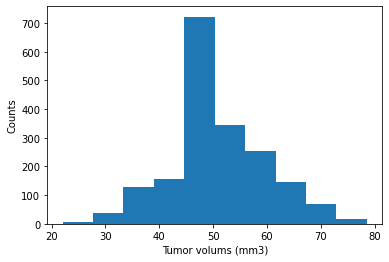

In [15]:
#Looking into the data and checking distribution of the tumor volume data
plt.hist(data_clean["Tumor Volume (mm3)"])
plt.xlabel("Tumor volums (mm3)")
plt.ylabel("Counts")
plt.show()

## Summary Statistics

In [16]:
#Creating summary statistics table using groupby object by
#drug regimen and staring with a mean of tumor volums
summary_statistics = pd.DataFrame(data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary_statistics

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [17]:
#Renaming column in the summary statistics dataframe according to its purpose
summary_statistics = summary_statistics.rename(columns={"Tumor Volume (mm3)": "Mean(tumors)"})
summary_statistics

,Mean(tumors)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [18]:
#Calculating median, variance, standard deviation, and SEM of the tumor volume for each regimen
#and adding values to the dataframe
summary_statistics["Median(tumors)"] = data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_statistics["Variance(tumors)"] = data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_statistics["Std.deviation(tumors)"] = data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_statistics["SEM(tumors)"] = data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_statistics

,Mean(tumors),Median(tumors),Variance(tumors),Std.deviation(tumors),SEM(tumors)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
#Generating mean of summary statistics values for each drug
#for purposes of creating a line graph
average_per_drug = summary_statistics.mean(axis=1)
average_per_drug

Drug Regimen
Capomulin    22.501087
Ceftamin     30.079103
Infubinol    30.978709
Ketapril     37.274305
Naftisol     36.349100
Placebo      35.178586
Propriva     30.757125
Ramicane     21.908789
Stelasyn     34.879795
Zoniferol    32.214266
dtype: float64

In [20]:
#Sorting summary statistics values for each drug
#in order to create a line graph
average_per_drug = average_per_drug.sort_values(ascending=False)
average_per_drug

Drug Regimen
Ketapril     37.274305
Naftisol     36.349100
Placebo      35.178586
Stelasyn     34.879795
Zoniferol    32.214266
Infubinol    30.978709
Propriva     30.757125
Ceftamin     30.079103
Capomulin    22.501087
Ramicane     21.908789
dtype: float64

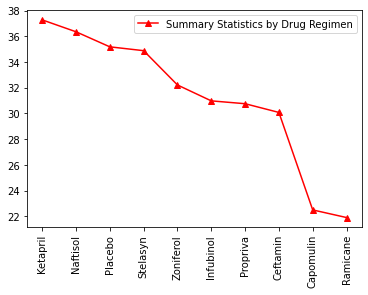

In [21]:
#Creating a line graph of summary statistics for each drug.
#The purpose is compare results between different drug regimens
summary = average_per_drug.keys()
final_summary, = plt.plot(summary, average_per_drug, color="red", marker="^", label="Summary Statistics by Drug Regimen" )
plt.legend(handles=[final_summary])
plt.xticks(rotation=90)
plt.show()

In [22]:
#Generating mean of summary statistics values for each value
#for purposes of creating a line graph
average_per_value = summary_statistics.mean(axis=0)
average_per_value

Mean(tumors)             50.975982
Median(tumors)           49.902123
Variance(tumors)         47.858440
Std.deviation(tumors)     6.821103
SEM(tumors)               0.502785
dtype: float64

In [23]:
#Sorting summary statistics values for each value
#in order to create a line graph
average_per_value = average_per_value.sort_values(ascending=False)
average_per_value

Mean(tumors)             50.975982
Median(tumors)           49.902123
Variance(tumors)         47.858440
Std.deviation(tumors)     6.821103
SEM(tumors)               0.502785
dtype: float64

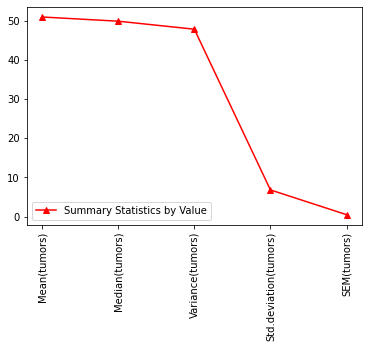

In [24]:
#Creating a line graph of summary statistics for each value.
#The purpose is compare results between different values.
summary = average_per_value.keys()
final_summary, = plt.plot(summary, average_per_value, color="red", marker="^", label="Summary Statistics by Value" )
plt.legend(handles=[final_summary])
plt.xticks(rotation=90)
plt.show()

## Bar and Pie Charts

In [25]:
#Creating a new dataframe with number of mice per drug regimen
#for purpose creating different charts
mice_per_drug = pd.DataFrame(data_clean.groupby("Drug Regimen")["Mouse ID"].nunique())
mice_per_drug

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


In [26]:
mice_per_drug = mice_per_drug.rename(columns={"Mouse ID": "Mice count"})
mice_per_drug

,Mice count
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


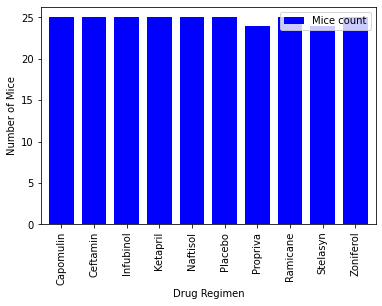

In [27]:
#Creating a bar plot, using pandas 
count_plot = mice_per_drug.plot(kind="bar", color='b', width=0.75, figsize=(6,4))
count_plot.set_xlabel("Drug Regimen")
count_plot.set_ylabel("Number of Mice")
plt.show()

In [28]:
#Setting an index for purpose to create a bar chart
#using matplotlib
mice_per_drug_index = mice_per_drug.reset_index()
mice_per_drug_index


,Drug Regimen,Mice count
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


Text(0, 0.5, 'Number of mice')

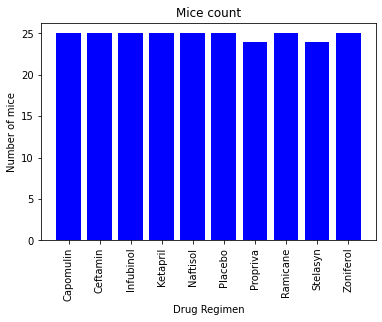

In [29]:
#Creating a bar plot, using matplotlib 
x_axis = np.arange(len(mice_per_drug_index))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(6,4))
plt.bar(x_axis, mice_per_drug_index["Mice count"], color='b', alpha=1, align="center")
plt.xticks(tick_locations, mice_per_drug_index["Drug Regimen"], rotation="vertical")
plt.title("Mice count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")

In [30]:
#Creating a groupby object for generating pie plots 
gender_distribution = data_clean.groupby("Sex")["Mouse ID"].nunique()
gender_distribution

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Percent of gender')

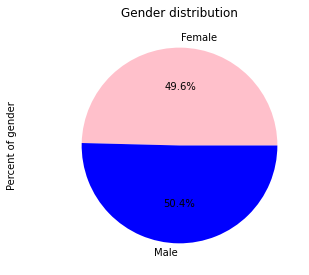

In [31]:
# Generating a pie plot showing the distribution of female versus male mice using pandas

pandas_pie = gender_distribution.plot(kind="pie", y="Sex", autopct="%1.1f%%",
                                      colors = ["pink", "blue"], title="Gender distribution", figsize=(4.5, 4.5))
pandas_pie.set_ylabel("Percent of gender", labelpad=40)

Text(0, 0.5, 'Percent of gender')

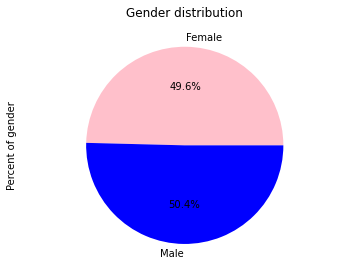

In [32]:
# Generating a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Female", "Male"]
colors = ["pink","blue"]
plt.pie(gender_distribution, explode=None, labels=gender, colors=colors,
        autopct="%1.1f%%", startangle=0)
plt.axis("equal")
plt.title("Gender distribution", pad=20)
plt.ylabel("Percent of gender", labelpad=0)

## Quartiles, Outliers and Boxplots

In [33]:
#Creating a new dataframe for following treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
data_chosen = data_clean.loc[((data_clean["Drug Regimen"] == "Capomulin") |
                             (data_clean["Drug Regimen"] == "Ramicane") |
                             (data_clean["Drug Regimen"] == "Infubinol") |
                             (data_clean["Drug Regimen"] == "Ceftamin")),:]
data_chosen

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [34]:
#Checking the number of mice in the dataframe
data_chosen["Mouse ID"].nunique()

100

In [35]:
#Creating a new dataframe with the last (greatest) timepoint for each mouse
timepoint_max = pd.DataFrame(data_chosen.groupby("Mouse ID")["Timepoint"].max())
timepoint_max

,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45
...,...
y769,45
y793,45
y865,45


In [36]:
#Merging to dataframes in order to find tumors sizes 
#at the last (greatest) timepoint for each mouse
timepoint_data = data_chosen.merge(timepoint_max, how="outer", on="Mouse ID")
timepoint_data

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
809,m601,25,33.118756,1,Capomulin,Male,22,17,45
810,m601,30,31.758275,1,Capomulin,Male,22,17,45
811,m601,35,30.834357,1,Capomulin,Male,22,17,45
812,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [37]:
#Cleaning the merged dataframe in order to extract needed information
chosen_regimens = pd.DataFrame(timepoint_data.loc[timepoint_data["Timepoint_x"] == timepoint_data["Timepoint_y"], 
                   ["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]])
chosen_regimens

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,b128,Capomulin,38.982878
11,c326,Infubinol,36.321346
21,c139,Infubinol,72.226731
23,v339,Infubinol,46.250112
30,a577,Infubinol,57.031862
...,...,...,...
778,t565,Capomulin,34.455298
788,i557,Capomulin,47.685963
798,m957,Capomulin,33.329098
803,f966,Capomulin,30.485985


In [38]:
#Reseting index for a new dataframe
chosen_regimens = chosen_regimens.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
chosen_regimens = chosen_regimens.reset_index(drop=True)
chosen_regimens

,Mouse ID,Drug Regimen,Final Tumor Volume (mm3)
0,b128,Capomulin,38.982878
1,c326,Infubinol,36.321346
2,c139,Infubinol,72.226731
3,v339,Infubinol,46.250112
4,a577,Infubinol,57.031862
...,...,...,...
95,t565,Capomulin,34.455298
96,i557,Capomulin,47.685963
97,m957,Capomulin,33.329098
98,f966,Capomulin,30.485985


In [39]:
#Calculating the quartiles and IQR and quantitatively determine 
#if there are any potential outliers across all four treatment regimens
quartiles = chosen_regimens["Final Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Final tumor volumes below {lower_bound} could be outliers.")
print(f"Final tumor volumes above {upper_bound} could be outliers.")


The lower quartile of final tumor volume is: 37.187743802499995
The upper quartile of final tumor volume is: 59.930261755000004
The interquartile range of final tumor volume is: 22.74251795250001
The the median of final tumor volume is: 45.0 
Final tumor volumes below 3.0739668737499812 could be outliers.
Final tumor volumes above 94.04403868375002 could be outliers.


In [40]:
#Checking is there any outliers across all four drug regimens
outliers = chosen_regimens.loc[(chosen_regimens["Final Tumor Volume (mm3)"] < lower_bound) 
                               | (chosen_regimens["Final Tumor Volume (mm3)"] > upper_bound)]
outliers
#There is no outliers for group of these four regimens

,Mouse ID,Drug Regimen,Final Tumor Volume (mm3)


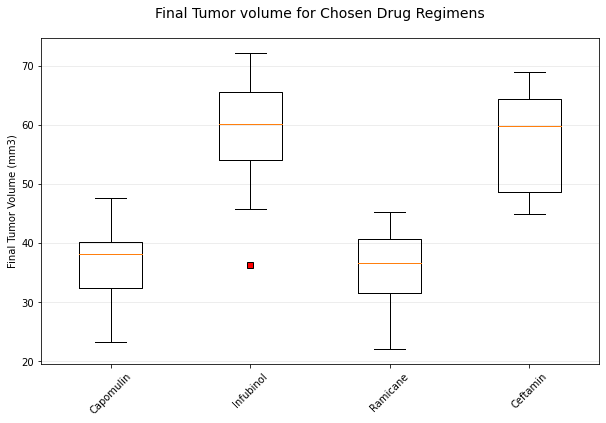

In [41]:
#Creating a box plot for four chosen drug regimens,
#checking outliers for each drug regimen
chosen_regimens_data = [chosen_regimens.loc[chosen_regimens["Drug Regimen"] == "Capomulin", "Final Tumor Volume (mm3)"],
                chosen_regimens.loc[chosen_regimens["Drug Regimen"] == "Infubinol", "Final Tumor Volume (mm3)"],
                chosen_regimens.loc[chosen_regimens["Drug Regimen"] == "Ramicane", "Final Tumor Volume (mm3)"],
                chosen_regimens.loc[chosen_regimens["Drug Regimen"] == "Ceftamin", "Final Tumor Volume (mm3)"]
               ]
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title("Final Tumor volume for Chosen Drug Regimens", fontsize=14, pad=20)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontsize=10)
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
xtickNames = plt.setp(ax1, xticklabels=["Capomulin", "Infubinol", "Ramicane", "Ceftamin"])
plt.setp(xtickNames, rotation=45, fontsize=10)
ax1.boxplot(chosen_regimens_data, flierprops=dict(markerfacecolor="r", marker="s"))
plt.show()


## Line and Scatter Plots

In [42]:
#Creating a new dataframe with Capomulin study results
capomulin_raw = pd.DataFrame(data_clean.loc[data_clean["Drug Regimen"] =="Capomulin",:])
capomulin_raw

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [43]:
#Checking mice ID with purpose to chose one mouse for studying
capomulin_raw["Mouse ID"].unique()

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

In [44]:
#Creating a dataframe with a chosen mouse
mouse_m601 = pd.DataFrame(data_clean.loc[data_clean["Mouse ID"] == "m601"])
mouse_m601

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1883,m601,0,45.000000,0,Capomulin,Male,22,17
1884,m601,5,41.408591,1,Capomulin,Male,22,17
1885,m601,10,36.825367,1,Capomulin,Male,22,17
1886,m601,15,35.464612,1,Capomulin,Male,22,17
1887,m601,20,34.255732,1,Capomulin,Male,22,17
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17
1892,m601,45,28.430964,1,Capomulin,Male,22,17


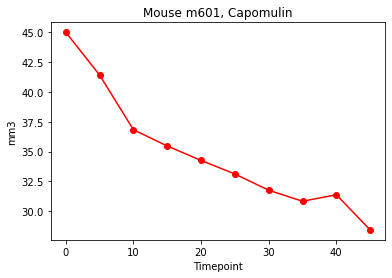

In [45]:
#Creating a line graph of treatment progress for the chosen mouse
x_axis = mouse_m601["Timepoint"]
y_axis = mouse_m601["Tumor Volume (mm3)"]
plt.title("Mouse m601, Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("mm3")
plt.plot(x_axis, y_axis, color="red", marker="o")
plt.show()

In [46]:
#Creating a new dataframe with average tumor volume for Capomulin drug regimen
capomulin_results = pd.DataFrame(capomulin_raw.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
capomulin_results

,Tumor Volume (mm3)
Mouse ID,
b128,41.963636
b742,40.083699
f966,36.505973
g288,41.990097
g316,44.613344
i557,44.805810
i738,39.141053
j119,44.465236
j246,43.216925


In [47]:
#Renaming column for aesthetic purposes 
capomulin_results = capomulin_results.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
capomulin_results

,Average Tumor Volume (mm3)
Mouse ID,
b128,41.963636
b742,40.083699
f966,36.505973
g288,41.990097
g316,44.613344
i557,44.805810
i738,39.141053
j119,44.465236
j246,43.216925


In [48]:
#Getting weight of each mouse
capomulin_results["Weight"] = capomulin_raw.groupby("Mouse ID")["Weight (g)"].mean()
capomulin_results

,Average Tumor Volume (mm3),Weight
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


Text(0, 0.5, 'Average Tumor Volume (mm3)')

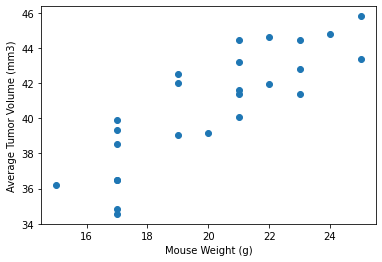

In [49]:
#Creating a scatter plot showing weight and average tumor volume for each mose treated with Capomulin
tumor_volume =capomulin_results["Average Tumor Volume (mm3)"]
weight = capomulin_results["Weight"]
plt.scatter(weight, tumor_volume)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [50]:
# Calculating the correlation coefficient for mouse weight 
#and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


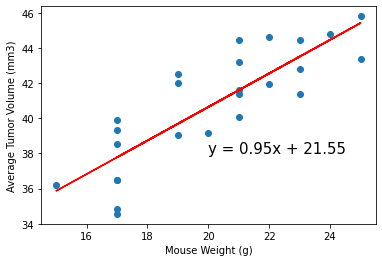

In [51]:
# Calculating the linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tumor_volume =capomulin_results["Average Tumor Volume (mm3)"]
weight = capomulin_results["Weight"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tumor_volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq, (20,38), fontsize=15, color="black")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

